<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3. 신경망

 퍼셉트론에서 신경망으로


* 다층 퍼셉트론으로 복잡한 함수를 표현할 수 있음
* 여전히 가중치를 설정하는 작업은 여전히 사람이 해야 함
* 매개변수의 적절한 값을 데이터로부터 자동으로 학습할 수 있도록 하는 것 -> 신경망

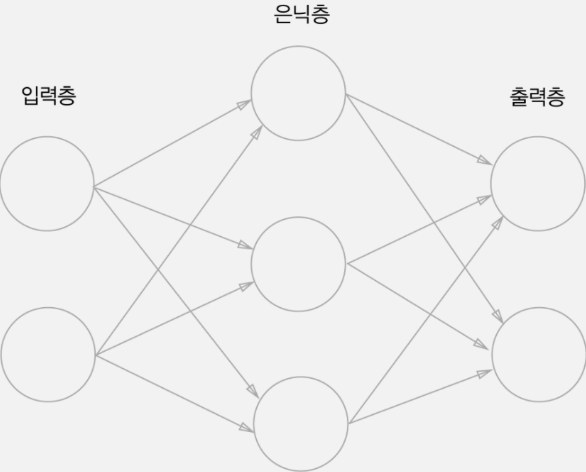

신경망의 예

* 신경망은 입력층 (0층), 은닉층 (1층), 출력층 (2층)으로 구성됨
* 여기서 은닉층의 뉴런은 (입력층과 출력층과 달리) 사람 눈에 보이지 않음

  * 위 그림에서 신경망은 모두 3층으로 구성이 되지만, 가중치를 갖는 층은 2개뿐이기에
  * 2층 신경망이라고 한다. / 문헌에 따라 3층 신경망이라고 하는 경우도 있다.

퍼셉트론 복습


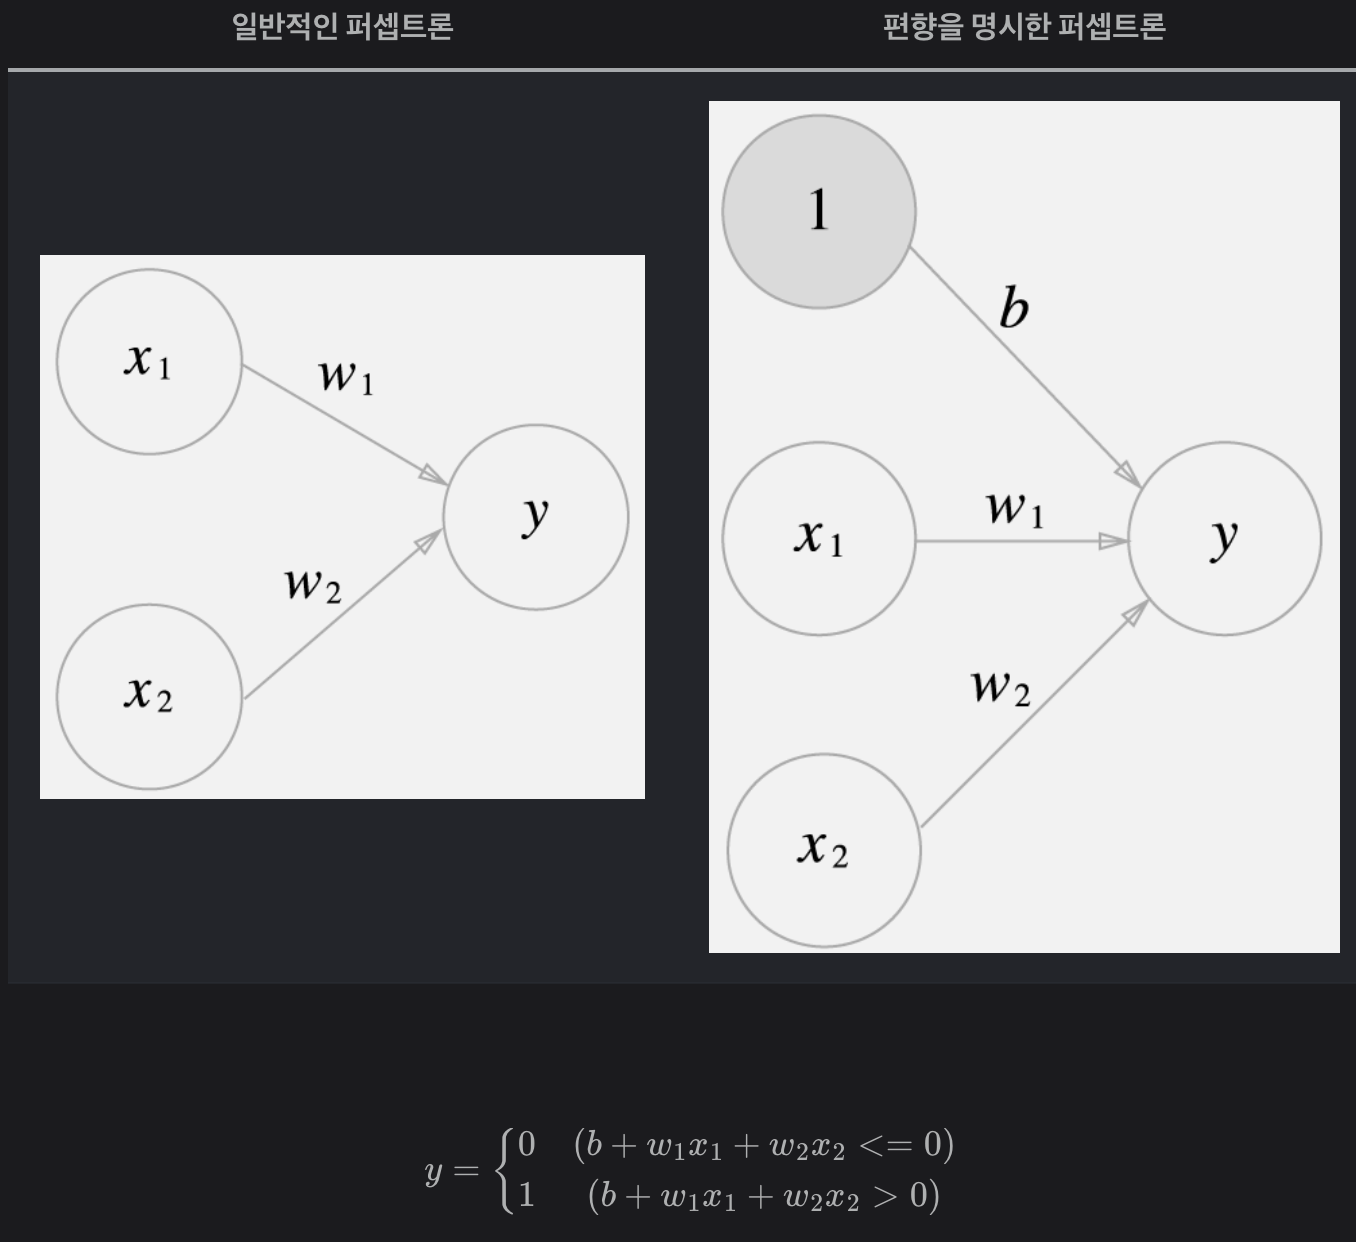

* b는 편향을 뜻하며, 뉴런이 얼마나 쉽게 활성화 되는지를 제어
* w1, w2는 각 신호의 가중치를 뜻하며, 각 신호의 영향력을 제어
* <편향을 명시한 퍼셉트론> 그림에서는 x1, x2, 1
에 각 신호의 가중치를 곱한 후, 다음 뉴런에 전달
* 다음 뉴런에서는 이 신호들의 값을 더해서 활성화 될지 여부를 결정
* 이때, 조건 분기의 동작 (0 이상이면 1 출력, 그렇지 않으면 0 출력)을 다음과 같이
h(x)로 정의
* 입력 신호의 총합이 h(x)함수를 거쳐서 변환되어, 그 값이 y의 출력됨

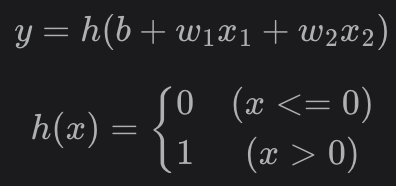

활성화 함수의 등장

* h(x)라는 함수가 등장했는데, 이처럼 입력 신호의 총합을 출력 신호로 변환하는 함수를 일반 적으로 활성화 함수라고 한다.

* 위에서 정의한 식을 조금 풀어서 적으면 다음과 같이 표현 가능
이 식에서 a는 가중치가 달린 입력 신호와 편향의 총합을 계산 한 값

* 즉, 가중치 신호를 조합한 결과가 a라는 노드가 되고,
h(x)를 통과하여 y라는 노드로 변환

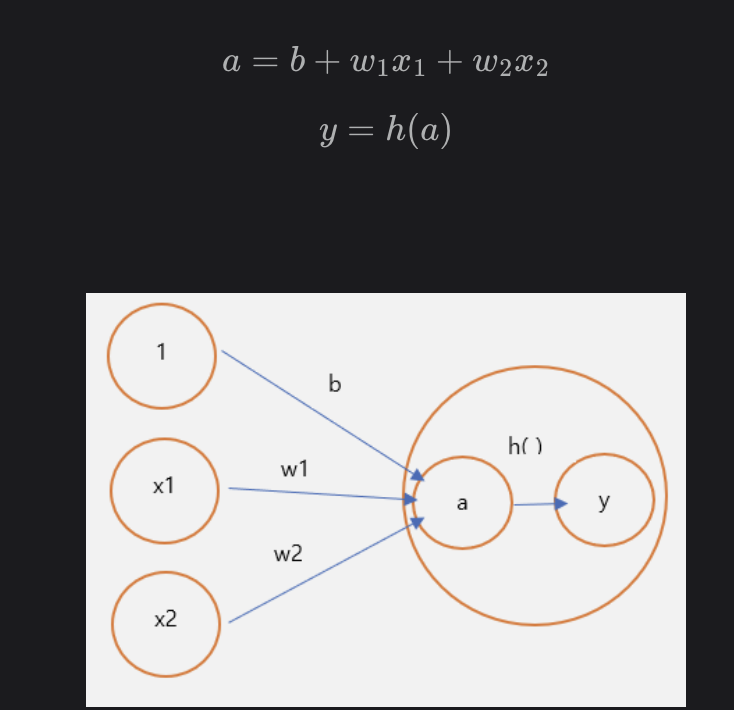

# 3. 활성화 함수

* 위에서 이야기 했던
h(x)함수는 임계값을 경계로 출력이 바뀌는데, 이를 계단함수라고 정의
* 따라서 퍼셉트론에서는 활성화 함수로 계단 함수를 이용
물론 신경망에서는 계단 함수 외에 다른 함수를 사용하고 있음

  * 단순 퍼셉트론 - 계단 함수를 활성화 함수
  * 다층 퍼셉트론 - 시그모이드 함수 등의 매끈한 활성화 함수를 사용하는 신경망을 가르킴

시그모이드 함수

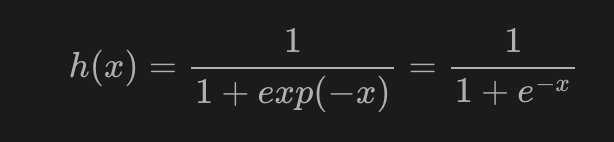

* 신경망에서는 활성화 함수로 시그모이드 함수를 이용하여 신호를 변환하고, 변환된 신호를 다음 뉴런에 전달
* 퍼셉트론과 신경망의 주된 차이는 활성화 함수라고 할 수 있음

계단 함수 구현하기

In [3]:
import numpy as np

In [11]:
def step_function(x):
  if x > 0:
      return 1
  else:
      return 0

In [15]:
# 구현은 쉽지만 실수만 받아들인다. step_function(3.0)은 되지만 넘파이 배열을 인수로 넣을 수는 없다.

def array_step_function(x):
  y = x > 0
  return y.astype(int)

In [12]:
print(step_function(1))    # 1
print(step_function(-1))   # 0

1
0


In [16]:
print(array_step_function(np.array([1, 2])))   # [1 1]
print(array_step_function(np.array([1, -1])))  # [1 0]

[1 1]
[1 0]


계단 함수의 그래프


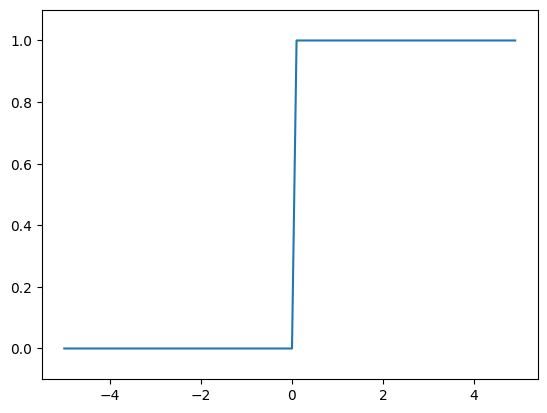

In [18]:
import numpy as np
import matplotlib.pylab as plt

def step_function(x):
  return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축의 범위 지정
plt.show()


시그모이드 함수 구현하기

In [20]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [21]:
x = np.array([-1, 1, 2]) # 브로드캐스트
sigmoid(x)  # array([0.26894142, 0.73105858, 0.88079708])

array([0.26894142, 0.73105858, 0.88079708])

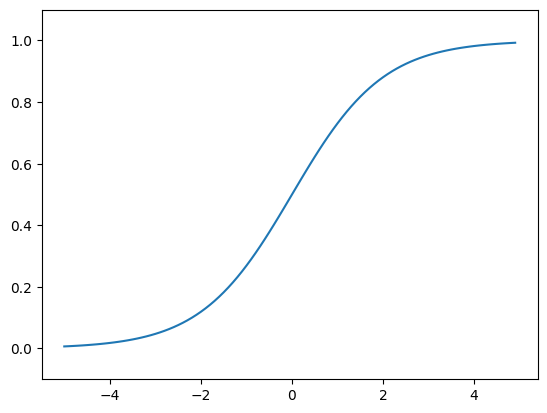

In [27]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

[차이점] 매끄러움
* 이 매끄러움이 신경망 학습에서 매우 중요한 역할을 하게 될 것
* 시그모이드 함수는 부드러운 곡선이며, 입력에 따라서 출력이 연속적으로 변화
* 한편, 계단 함수는 0을 경계로 출력이 갑자기 바뀜

[차이점] 출력값의 범위가 다름
* 계단 함수는 0과 1 중 하나의 값만 출력
* 한편, 시그모이드 함수는 실수도 출력 가능
* 즉, 퍼셉트론에서는 뉴런 사이에 0이나 1만 흘렀지만, 신경망에서는 연속적인 실수가 흐름

[공통점] 큰 관점에서 보면 같은 모양을 보임
* 입력이 작을 때는 0에 가깝고, 입력이 클 때는 1에 가까워짐
* 즉, 두 함수 모두 입력이 중요하면 큰 값을 출력하고, 입력이 중요하지 않으면 작은 값을 출력
* 또한 입력이 아무리 작거나, 커도 출력은 0과 1 사이의 값을 가짐

[공통점] 비선형 함수
* 시그모이드 함수는 곡선, 계단 함수는 구부러진 직선 형태의 비선형 함수 꼴을 보임

비선형 함수

* 신경망에서는 활성화 함수로 비선형 함수를 사용해야한다.
* 선형 함수로 하면 층을 깊게 하는 의미가 없어지기 때문이다.

* h(x) = cx
* y(x) = h(h(h(x))) -> c**3 * x 처럼 ax와 결국 같은 식이 된다.

ReLU 함수


* ReLU 함수는 입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하면 0을 출력하는 함수
* 이번 장에서는 시그모이드 함수를 사용하지만, 후반부에서는 ReLU 함수를 활성화 함수로 사용

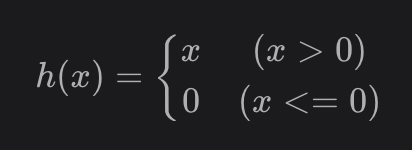

In [28]:
def relu(x):
    return np.maximum(0,x)

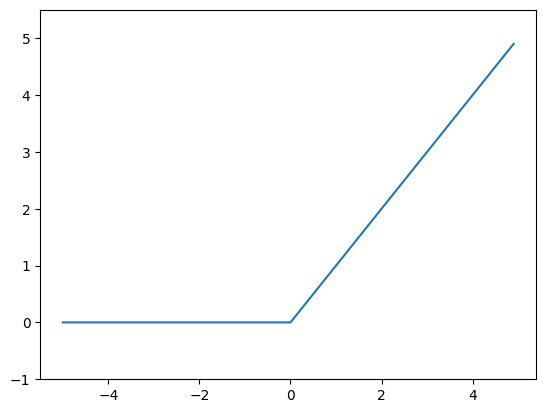

In [30]:
x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.ylim(-1, 5.5) # y축 범위 지정
plt.show()

# 다차원 배열의 계산

* 다차원 배열도 기본은 숫자의 집합
* 숫자가 한 줄로, 직사각형으로, N차원으로 나열된 것 등을 모두 다차원 배열이라고 정의
* 2차원 배열은 행렬 (Matrix)이라고 부르고, 가로 방향을 행, 세로 방향을 열이라고 정의

1차원

In [31]:
import numpy as np
A = np.array([1,2,3,4])
print(A)

[1 2 3 4]


In [32]:
np.ndim(A) # 차원의 수

1

In [33]:
A.shape

(4,)

In [34]:
A.shape[0]

4

2차원

In [38]:
B = np.array([[1,2],[3,4],[5,6]])
print(B)

np.ndim(B)

[[1 2]
 [3 4]
 [5 6]]


2

In [39]:
B.shape

(3, 2)

행렬의 곱

* 행렬의 곱은 numpy에서 np.dot() 함수를 통해서 확인 가능
* 주의해야 할 것은 np.dot(A, B)와 np.dot(B, A)는 달라질 수도 있음
* 행렬의 곱을 수행하기 위해서는 행렬 A의 열 수와 행렬 B의 행 수가 같아야 함

In [40]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print(np.dot(A, B))  # [[19 22] [43 50]]
print(np.dot(B, A))  # [[23 34] [31 46]]

[[19 22]
 [43 50]]
[[23 34]
 [31 46]]


In [41]:
A = np.array([[1, 2], [3, 4], [5, 6]])
B = np.array([7, 8])

print(A.shape, B.shape)  # (3, 2) (2,)
print(np.dot(A, B))      # [23 53 83]
                         # NumPy에는 “행벡터 / 열벡터” 개념이 없다 (1D 한정)

(3, 2) (2,)
[23 53 83]


신경망에서 행렬의 곱

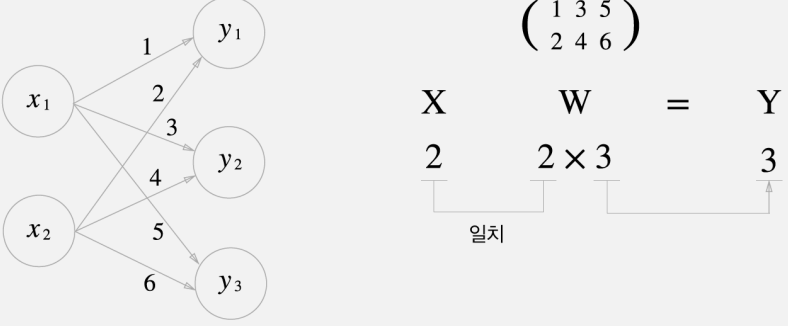

In [46]:
x = np.array([1,2])
print(x.shape)

W = np.array([[1,3,5], [2,4,6]])
print(W)

print(W.shape)

Y = np.dot(x, W)
print(Y)

(2,)
[[1 3 5]
 [2 4 6]]
(2, 3)
[ 5 11 17]


# 3층 신경망 구현하기

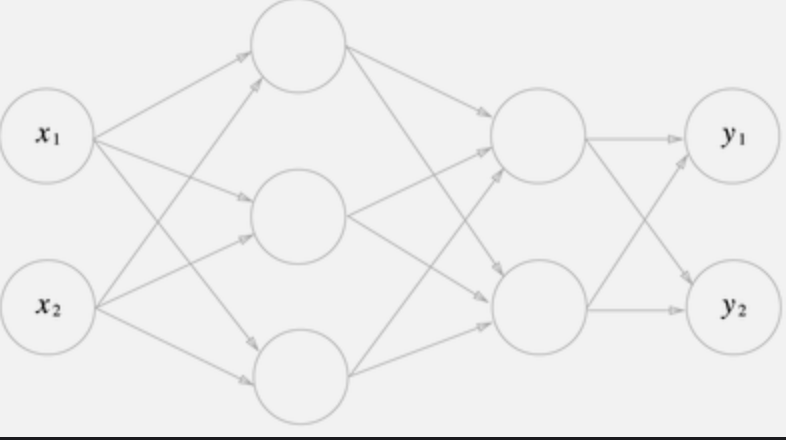

입력층 (0층)은 2개, 첫 번째 은닉층 (1층)은 3개, 두 번째 은닉층 (2층)은 2개, 출력층 (3층)은 2개의 뉴런

표기법 설명


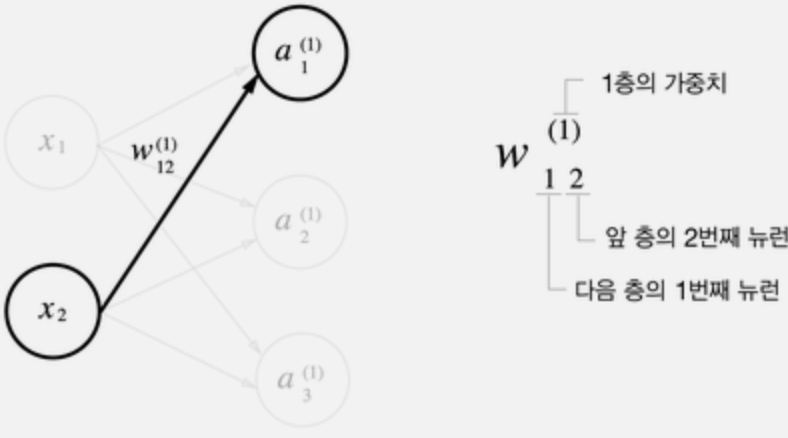

각 층의 신호 전달 구현하기


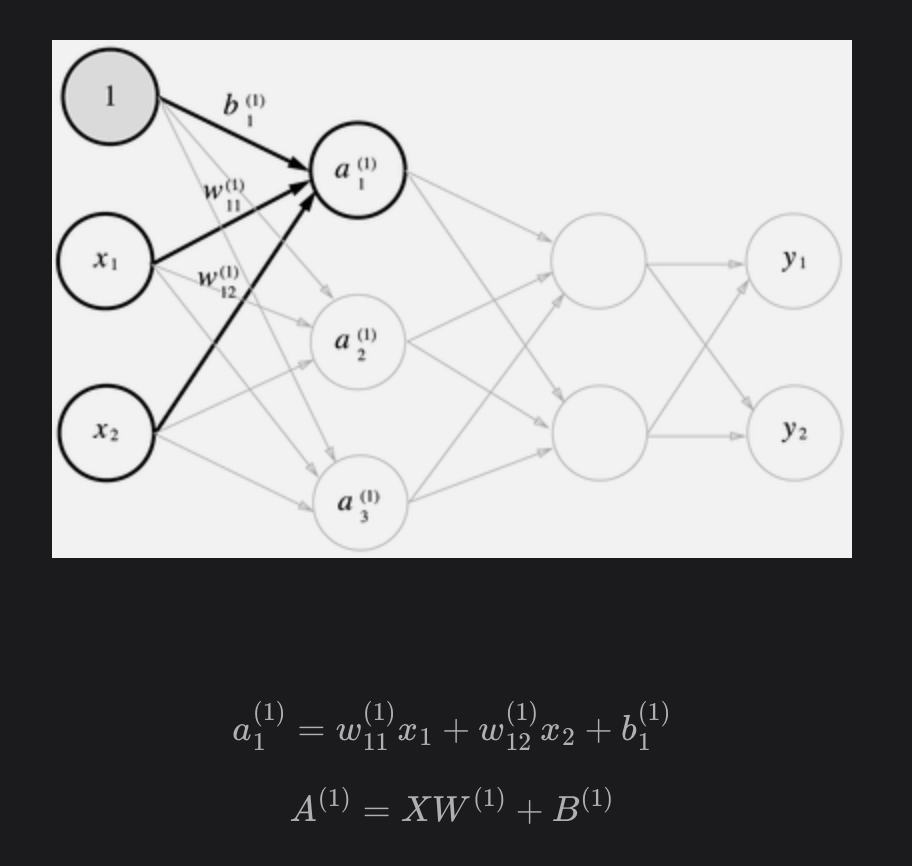

* 위 그림에서는 편향 b를 뜻하는 뉴런 1이 추가
* 편향은 오른쪽 아래 인덱스가 하나 밖에 없음 (앞 층의 편향 뉴런이 하나 뿐이기 때문)

In [48]:
X = np.array([1.0, 0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [49]:
A1 = np.dot(X,W1) + B1

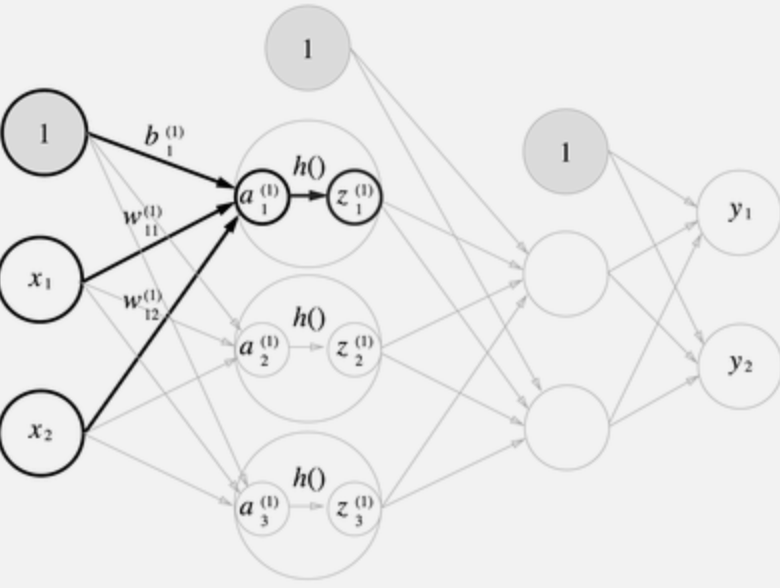

* 은닉층에서 가중치 합을 a로 표기하고, 활성화 함수 h(x)
로 변환된 신호를 z로 표기
* 여기서 활성화 함수는 시그모이드 함수를 활용

In [50]:
Z1 = sigmoid(A1)

print(f"A1 = {A1}") # A1 = [0.3 0.7 1.1]
print(f"Z1 = {Z1}") # Z1 = [0.57444252 0.66818777 0.75026011]

A1 = [0.3 0.7 1.1]
Z1 = [0.57444252 0.66818777 0.75026011]


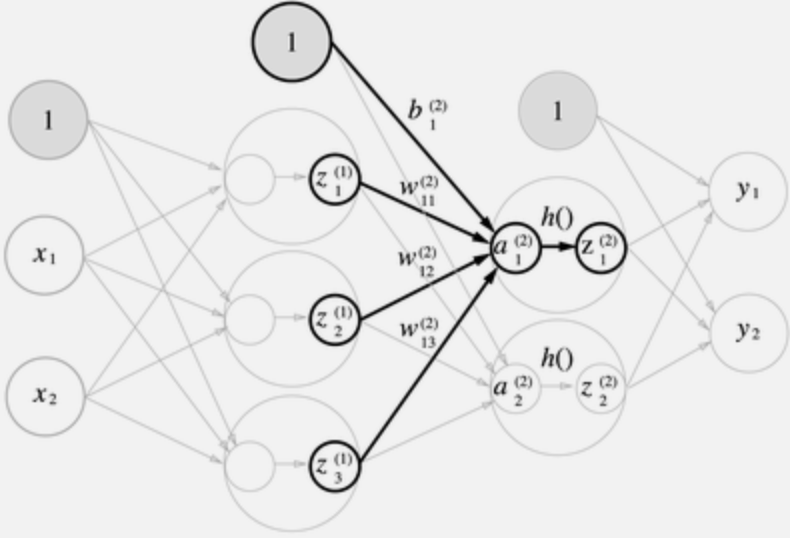

* 이번에는 1층의 출력값이었던 Z1이 입력이 된다는 점 빼고는 모두 동일

In [51]:
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

(3,)
(3, 2)
(2,)


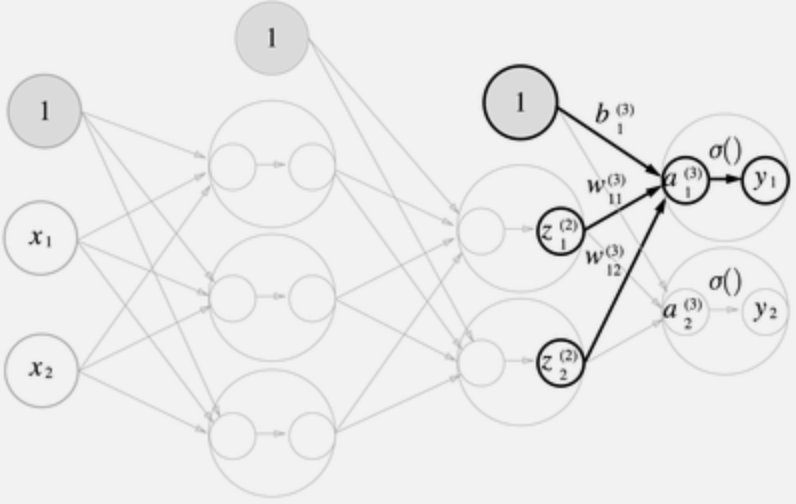

* 출력층의 활성화 함수는 입력을 그대로 출력해주는 항등 함수로 정의
* 출력층의 활성화 함수를 a
로 표시하여 은닉층의 활성화 함수인 h(x)
와 다름을 명시

In [52]:
def identity_func(x):
    return x

W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

print(Z2.shape, W3.shape, B3.shape) # (2,) (2, 2) (2,)

A3 = np.dot(Z2, W3) + B3
Y = identity_func(A3)

(2,) (2, 2) (2,)


구현 정리


* 신경망 구현 관례에 따라 가중치만 W1 같이 대문자로 표현, 그 외 편향과 중간 결과는 소문자로 표현
* 결국 내적계산으로 한번에 계산이 된것임

In [ ]:
# a1 = [
#   x · (노드1의 가중치),
#   x · (노드2의 가중치),
#   x · (노드3의 가중치)
# ]
# 실제
# x · W1 = [0.2, 0.5, 0.8]
# a1 = [0.2, 0.5, 0.8] + [0.1, 0.2, 0.3]
#     = [0.3, 0.7, 1.1]

In [53]:
# 가중치와 편향을 초기화하고, dic에 할당
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])

    return network

# 입력 신호를 출력으로 변환하는 처리 과정 구현
# 신호가 순방향 (입력 -> 출력)으로 전달되므로 forward (순전파)로 정의
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)

    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)

    a3 = np.dot(z2, W3) + b3
    y = identity_func(a3)

    return y

network = init_network()
x = np.array([1, 0.5])
y = forward(network, x)

print(y) # [0.31682708 0.69627909]

[0.31682708 0.69627909]


출력층 설계하기


* 신경망은 분류와 회귀 모두 이용 가능
  * 분류: 데이터가 어느 class에 속하는지를 찾는 유형
  * 회귀: 데이터에서 연속적인 수치를 예측하는 유형
* 일반적으로 회귀에는 항등 함수,
* 분류에는 시그모이드 및 소프트맥스 함수를 활성화 함수로 사용


항등 함수와 소프트맥스 함수 구현하기

* 항등 (identity) 함수는 입력을 그대로 출력하므로, 출력층에서 이를 사용하면 입력 신호가 그대로 출력
* 분류에서 사용하는 소프트맥스 (softmax) 함수
  * n은 출력층의 뉴런 수
  * yk는 그 중 k번째 출력을 뜻함

* 소프트맥스 함수의 출력은 모든 입력 신호로부터 화살표를 받고 있음
* 그 이유는 출력층의 각 뉴런이 모든 입력 신호에서 영향을 받았기 때문

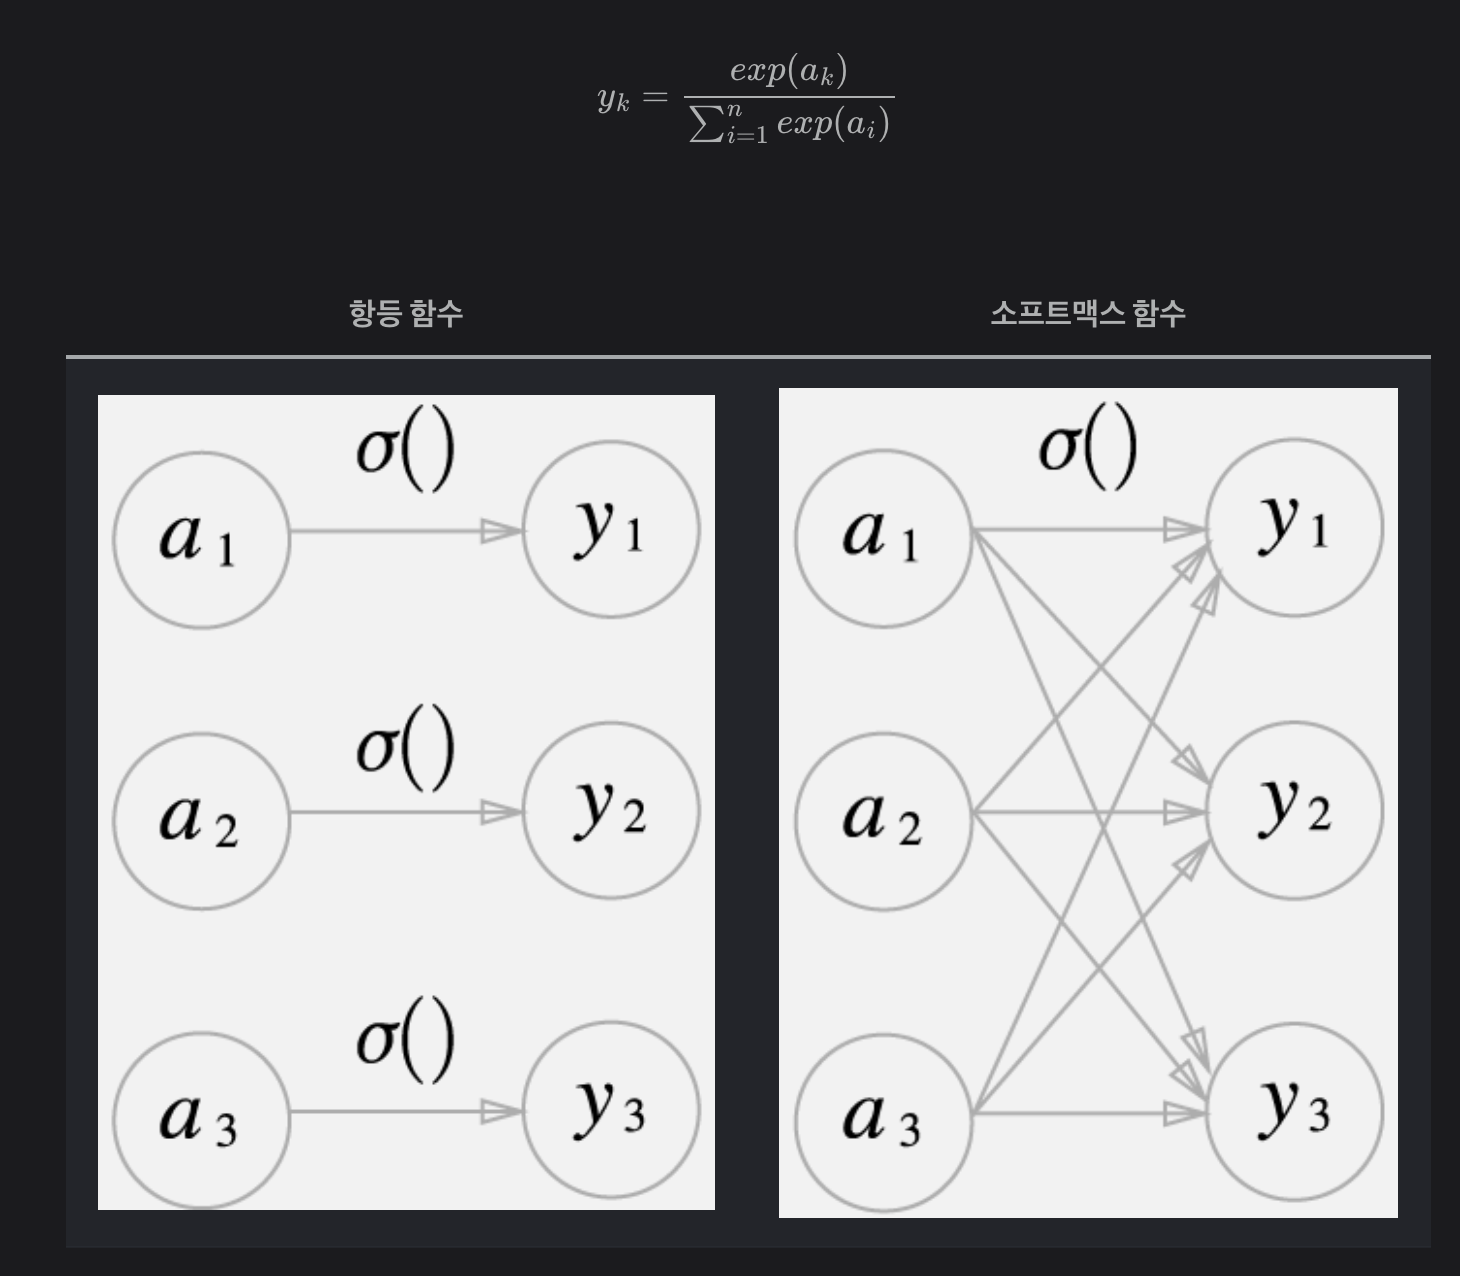

In [58]:
a = np.array([0.3, 2.9, 4.0])

exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a) # 지수 함수의 합
print(sum_exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a / sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
74.1221542101633
[0.01821127 0.24519181 0.73659691]
